# Foreword

The intention of this project is providing a thorough analysis of a dataset regarding it-related job offerings, where we analyse relevant aspects such as the job title, location and gross average salary. 

Due to time constraints, and the technical difficulties encountered in previous web scraping attempts, it has been withdrawn the option to scrap data from infojobs, since the general T&C of the website do not allow for web scrapping, plus, they have controls in place to block any web scrapping action. 

We insted take the data from a .csv dataset obtained from kaggle, whose link is provided in the initial section. 

1. the project consists of an analysis of IT industry job openings from a kaggle datasets that has a sample size of 3,755 elements
2. we provide information on the gross salary, irrespective of other benefits (contributions to pensions schema, health insurance, travel allowances, etc.)
3. we do not take into account the inflation effect / consumer price index (6,1% in the Eurozone as of June 2023) 
4. this dataset provides information as of April 2023 

Sources: digitalocean.com, kaggle, datacamp, geeks for geeks, eurostat, medium.com, towardsdatascience.com, educative.io, appsloveworld, datatechnotes

# Dataset 

# 1. Read the data

Data source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [1]:
import pandas as pd                   
import numpy as np   

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsRegressor

We will call 'init_dataset' to the original dataset that we have obtained from kaggle

In [2]:
init_dataset = pd.read_csv('ds_salaries (1).csv')
init_dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
print(init_dataset.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


With the following transformation we convert remote_ratios to unit values (0, 0.5, 1)

We will drop the variable 'work year', 'salary currency' and 'employee residence'

These variables will be essential though for data visualisation that we will perform with tableau 

On the other hand, we already have in the dataset the salary expressed in usd, which is a way to compare gross salaries across different locations worldwide where they have different currencies

We think that 'company location' might have a more direct impact on the 'salary' variable; 

New dataset looks like this: 

In [4]:
columns_to_drop = ['work_year', 'salary', 'salary_currency', 'employee_residence']
dataset = init_dataset.drop(columns=columns_to_drop)

In [5]:
dataset.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,85847,100,ES,L
1,MI,CT,ML Engineer,30000,100,US,S
2,MI,CT,ML Engineer,25500,100,US,S
3,SE,FT,Data Scientist,175000,100,CA,M
4,SE,FT,Data Scientist,120000,100,CA,M


In [6]:
print(dataset['experience_level'].unique())

['SE' 'MI' 'EN' 'EX']


In [7]:
print(dataset['employment_type'].unique())

['FT' 'CT' 'FL' 'PT']


In [8]:
print(dataset['job_title'].unique())

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engine

In [9]:
dataset['job_title'].nunique()

93

In [10]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bData', case=False)]

print(filtered_data['job_title'].unique())

['Principal Data Scientist' 'Data Scientist' 'Data Analyst' 'Data Modeler'
 'Data Strategist' 'Data Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect' 'Data Analytics Manager'
 'Business Data Analyst' 'Applied Data Scientist' 'Staff Data Analyst'
 'Data DevOps Engineer' 'Head of Data' 'Data Science Manager'
 'Data Manager' 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science' 'Lead Data Scientist'
 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engineer'
 'Data Operations Engineer' 'Data Science Lead' 'Data Science Consultant'
 'Data Analytics Specialist' 'BI Data Analyst' 'Head of Data Science'
 'Big Data Architect' 'Product Data Analyst' 'Azure Data Engineer'
 'Marketing Data Engineer' 'Data Analytics Lead' 'Data Lead'
 'Data Science Engineer' 'Manager Data Management'
 'Data Analytics Engineer' 'Data Analytics Consultant'
 'Data Management Specialist' 'Data

In [11]:
filtered_data['job_title'].nunique()

57

In [12]:
filtered_data = dataset[dataset['job_title'].str.contains(r'\bMachine', case=False)]

print(filtered_data['job_title'].unique())

['Machine Learning Engineer' 'Applied Machine Learning Engineer'
 'Machine Learning Researcher' 'Machine Learning Scientist'
 'Applied Machine Learning Scientist'
 'Machine Learning Infrastructure Engineer'
 'Machine Learning Software Engineer' 'Machine Learning Research Engineer'
 'Machine Learning Developer' 'Principal Machine Learning Engineer'
 'Machine Learning Manager' 'Lead Machine Learning Engineer'
 'Head of Machine Learning']


In [13]:
filtered_data['job_title'].nunique()

13

In [14]:
print(dataset['remote_ratio'].unique())

[100   0  50]


In [15]:
print(dataset['company_location'].unique())

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [16]:
dataset['company_location'].nunique()

72

Some previous considerations regarding some variables: 

1. work_year might be treated as a categorical variable; it might be also helpful in order to provide the plot for the categoricals

2. remote_ration indicates the proportion of the time (in %) that the work is performed remotely

3. it might be interesting to find as well some outliers, in particular, when dealing with large vs. small companies, experience level entry level vs. management position 

# 2. Exploratory data analysis 

We provide sns countplots to get an idea of hoe certain values are distributed in the dataset, including work year, experience level, employment type and company size, however, this information will be analysed in more detail with Tableau data visualisation 

In [17]:
dataset.shape

(3755, 7)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3755 non-null   object
 1   employment_type   3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [19]:
print(dataset.isnull().sum())

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64


We have a dataset with 3,755 elements and none of them are null 

# Get num and cat variables 

In [20]:
num = dataset.select_dtypes(include=np.number)
num

,salary_in_usd,remote_ratio
0,85847,100
1,30000,100
2,25500,100
3,175000,100
4,120000,100
...,...,...
3750,412000,100
3751,151000,100
3752,105000,100
3753,100000,100


In [21]:
cat = dataset.select_dtypes(exclude=np.number)
cat

,experience_level,employment_type,job_title,company_location,company_size
0,SE,FT,Principal Data Scientist,ES,L
1,MI,CT,ML Engineer,US,S
2,MI,CT,ML Engineer,US,S
3,SE,FT,Data Scientist,CA,M
4,SE,FT,Data Scientist,CA,M
...,...,...,...,...,...
3750,SE,FT,Data Scientist,US,L
3751,MI,FT,Principal Data Scientist,US,L
3752,EN,FT,Data Scientist,US,S
3753,EN,CT,Business Data Analyst,US,L


# Descriptive statistics 

In [22]:
dataset.describe()

,salary_in_usd,remote_ratio
count,3755.000000,3755.000000
mean,137570.389880,46.271638
std,63055.625278,48.589050
min,5132.000000,0.000000
25%,95000.000000,0.000000
50%,135000.000000,0.000000
75%,175000.000000,100.000000
max,450000.000000,100.000000


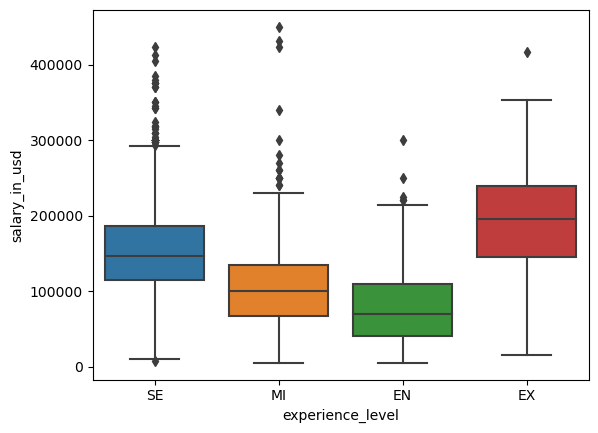

In [23]:
ax = sns.boxplot(x="experience_level", y="salary_in_usd", data=dataset)
plt.show()

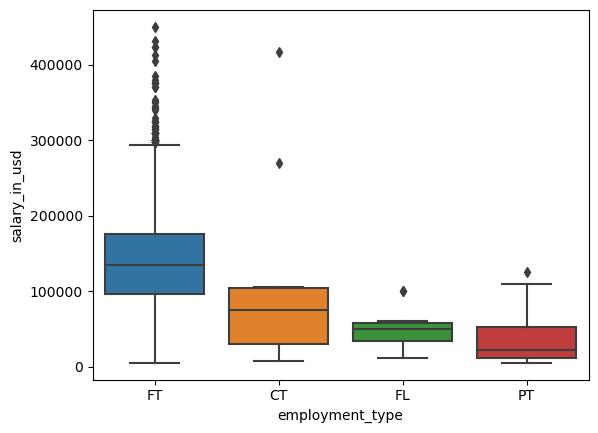

In [24]:
ax = sns.boxplot(x="employment_type", y="salary_in_usd", data=dataset)
plt.show()

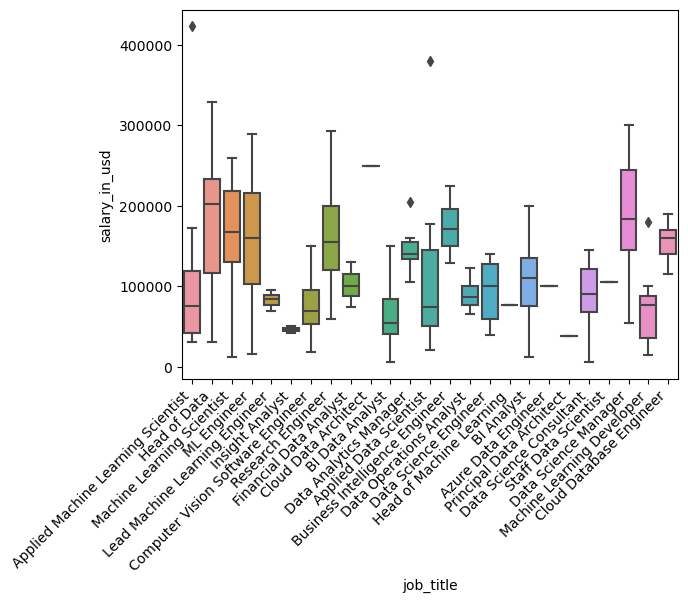

In [25]:
aggregated_data = dataset.groupby("job_title")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="job_title", y="salary_in_usd", data=dataset, order=aggregated_data["job_title"])
plt.xticks(rotation=45, ha="right")  

plt.show()

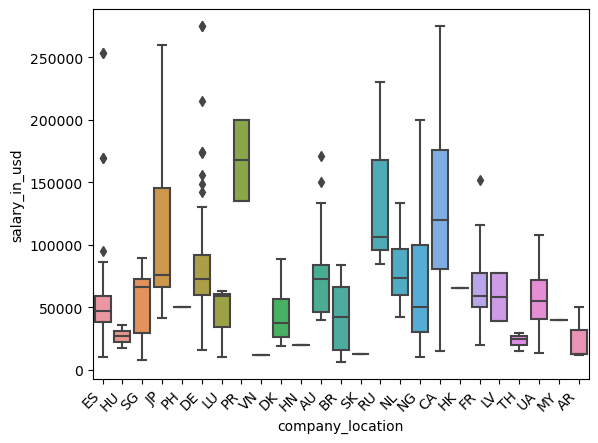

In [26]:
aggregated_data = dataset.groupby("company_location")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="company_location", y="salary_in_usd", data=dataset, order=aggregated_data["company_location"])
plt.xticks(rotation=45, ha="right")  

plt.show()

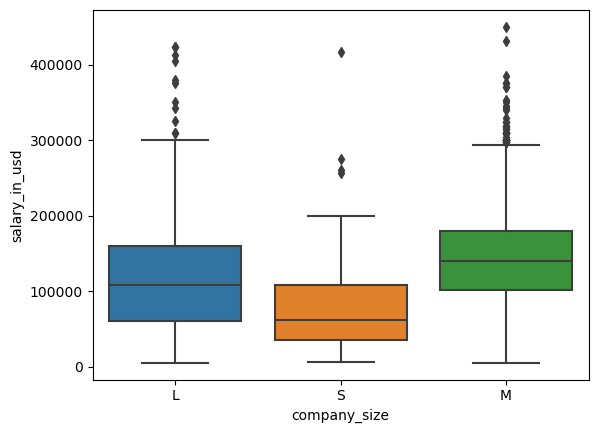

In [27]:
ax = sns.boxplot(x="company_size", y="salary_in_usd", data=dataset)
plt.show()

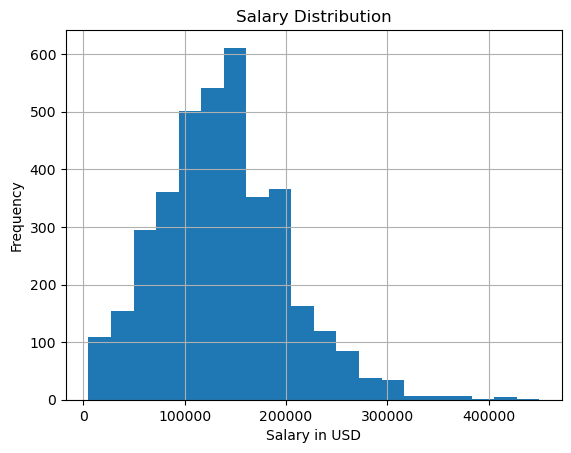

In [28]:
dataset.hist(column='salary_in_usd', bins=20)  
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

We see that 'medium' companies account for the majority of employers in the dataset, we might find some outliers from large and small companies

C:\Users\ruizg\AppData\Local\Temp\ipykernel_5220\3369820782.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='company_size', y='salary_in_usd', hue='experience_level', ci=None)


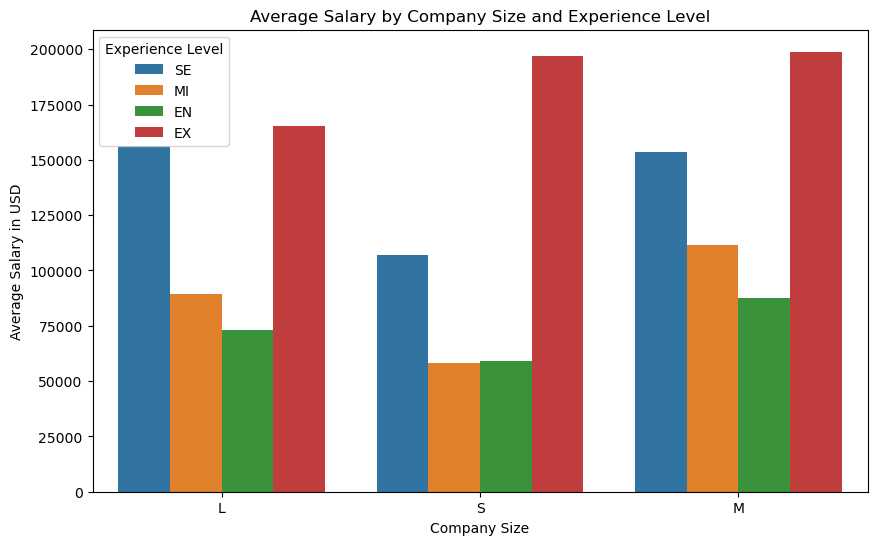

In [29]:
average_salary = dataset.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='company_size', y='salary_in_usd', hue='experience_level', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size and Experience Level')
plt.legend(title='Experience Level')
plt.show()

In [30]:
dataset.corr()

,salary_in_usd,remote_ratio
salary_in_usd,1.000000,-0.064171
remote_ratio,-0.064171,1.000000


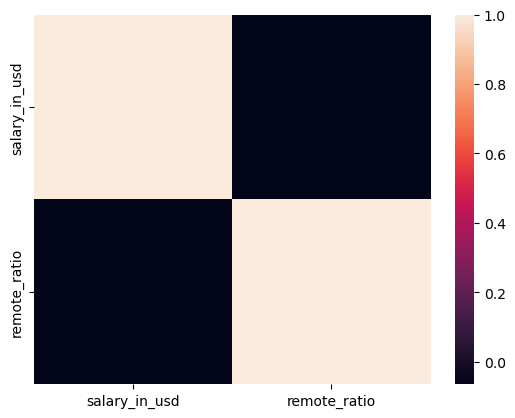

In [31]:
sns.heatmap(dataset.corr());

By using the IQR method, we will remove from our dataset outliers that lie above 75% percentile and below 25% percentile (Q3 and Q1)

In [32]:
Q1 = dataset['salary_in_usd'].quantile(0.25)
Q3 = dataset['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = dataset[(dataset['salary_in_usd'] >= lower_bound) & (dataset['salary_in_usd'] <= upper_bound)]
filtered_data

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,85847,100,ES,L
1,MI,CT,ML Engineer,30000,100,US,S
2,MI,CT,ML Engineer,25500,100,US,S
3,SE,FT,Data Scientist,175000,100,CA,M
4,SE,FT,Data Scientist,120000,100,CA,M
...,...,...,...,...,...,...,...
3749,SE,FT,Data Specialist,165000,100,US,L
3751,MI,FT,Principal Data Scientist,151000,100,US,L
3752,EN,FT,Data Scientist,105000,100,US,S
3753,EN,CT,Business Data Analyst,100000,100,US,L


In [33]:
filtered_data.describe()

,salary_in_usd,remote_ratio
count,3692.000000,3692.000000
mean,134262.993770,46.289274
std,57992.294349,48.589320
min,5132.000000,0.000000
25%,94916.250000,0.000000
50%,133916.000000,0.000000
75%,174500.000000,100.000000
max,293000.000000,100.000000


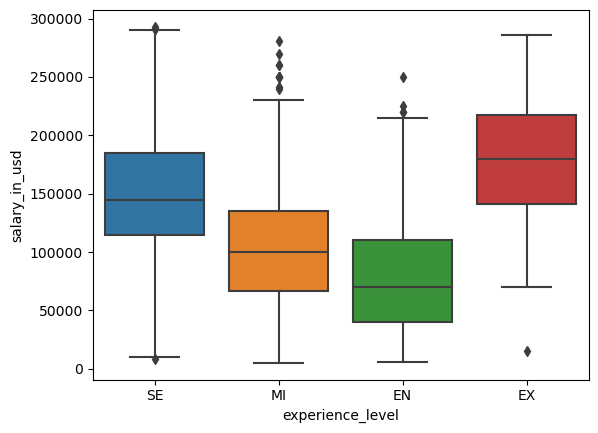

In [34]:
ax = sns.boxplot(x="experience_level", y="salary_in_usd", data=filtered_data)
plt.show()

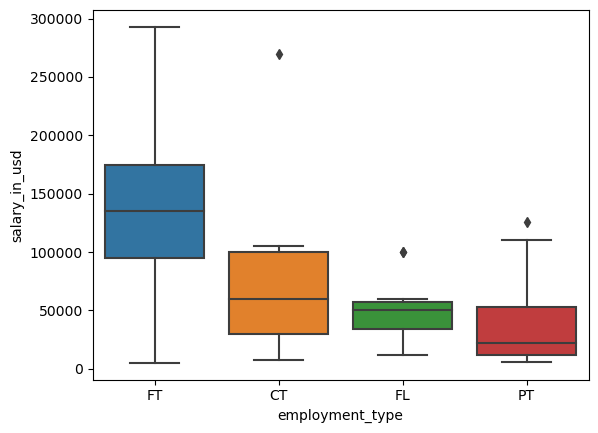

In [35]:
ax = sns.boxplot(x="employment_type", y="salary_in_usd", data=filtered_data)
plt.show()

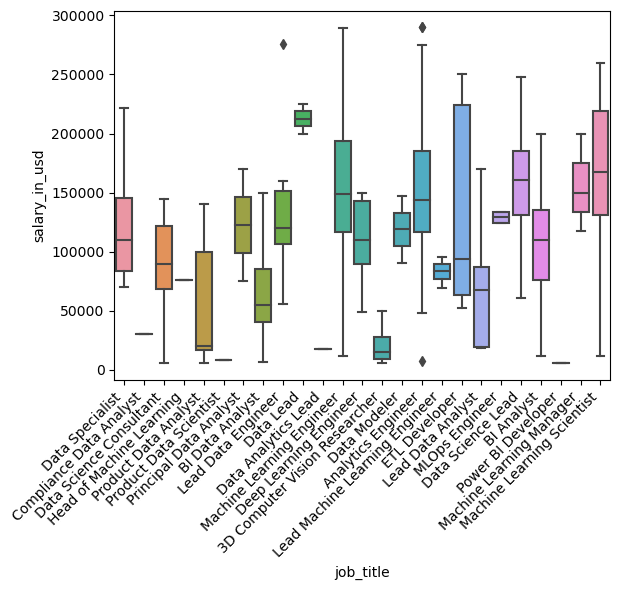

In [36]:
aggregated_data = filtered_data.groupby("job_title")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="job_title", y="salary_in_usd", data=filtered_data, order=aggregated_data["job_title"])
plt.xticks(rotation=45, ha="right")  

plt.show()

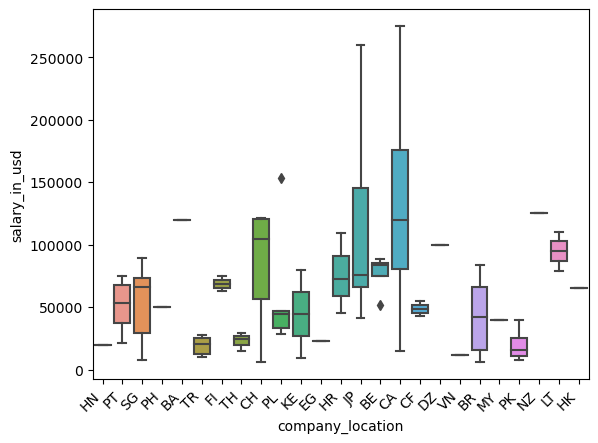

In [37]:
aggregated_data = filtered_data.groupby("company_location")["salary_in_usd"].median().reset_index()

aggregated_data = aggregated_data.sort_values(by="salary_in_usd", ascending=False)

max_categories = 25
if len(aggregated_data) > max_categories:
    aggregated_data = aggregated_data.sample(max_categories)


ax = sns.boxplot(x="company_location", y="salary_in_usd", data=filtered_data, order=aggregated_data["company_location"])
plt.xticks(rotation=45, ha="right")  

plt.show()

# Machine learning

1. Initial machine learning model 

In [38]:
X = filtered_data[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = filtered_data['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 128337434304.75812
Mean Squared Error (MSE): 1.5214642463279446e+24
Root Mean Squared Error (RMSE): 1233476487951.0046
R-squared (R^2): -442550747781866.56


# Machine learning: min-max scaler

In [55]:
X = filtered_data[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = filtered_data['salary_in_usd']


X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# We apply min-max scaler to the remote ratio, which is the only numerical value in the predictor variables dataset: 

scaler = MinMaxScaler()
X_train[['remote_ratio']] = scaler.fit_transform(X_train[['remote_ratio']])
X_test[['remote_ratio']] = scaler.transform(X_test[['remote_ratio']])

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 265788008483157.47
Mean Squared Error (MSE): 1.143764584860038e+31
Root Mean Squared Error (RMSE): 3381958877425978.0
R-squared (R^2): -3.326886409180355e+21


# Normalisation 

We apply normalisation to our machine learning model. Note that 'remote_ratio' is the only numerical predictor variable, the rest, are treated as categoricals. 

In [57]:
X = filtered_data[['remote_ratio']]
y = filtered_data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 46843.05166385117
Mean Squared Error (MSE): 3430989550.657965
Root Mean Squared Error (RMSE): 58574.64938570239
R-squared (R^2): 0.0020225615290765386


# Model performance issues

Some steps that we could take to improve the overall performance of the model include:
1. Hyperparam. tunning
2. Cross-valitation 

# Hyperparameter tuning

In [59]:
target = 'salary_in_usd'
predictors = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size']

X = filtered_data[predictors]
y = filtered_data[target]

X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

hyperparameters = {
    'alpha': [0.1, 1.0, 10.0],  
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']  
}

model = Ridge()

grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_hyperparameters = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ruizg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [83]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 36601.491153419716
Mean Squared Error (MSE): 2188601349.882017
Root Mean Squared Error (RMSE): 46782.48977857011
R-squared (R^2): 0.3633980119320389


# Cross validation 

In [85]:
target = 'salary_in_usd'
predictors = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size']

X = filtered_data[predictors]
y = filtered_data[target]

X = pd.get_dummies(X)

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

mse_scores = -cv_scores

mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean MSE: 1.4802079798949639e+26
Standard Deviation of MSE: 1.658298493328283e+26


In [86]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 36601.491153419716
Mean Squared Error (MSE): 2188601349.882017
Root Mean Squared Error (RMSE): 46782.48977857011
R-squared (R^2): 0.3633980119320389


# k-nearest - regression model 

In [87]:
X = filtered_data[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = filtered_data['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

k = 5  
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [88]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 41359.337753721244
Mean Squared Error (MSE): 2860310925.7624354
Root Mean Squared Error (RMSE): 53481.87474053649
R-squared (R^2): 0.1680167692800536


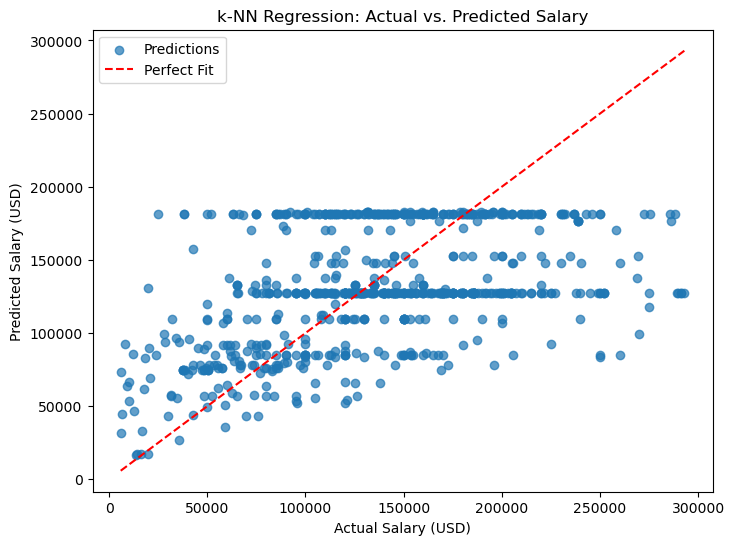

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('k-NN Regression: Actual vs. Predicted Salary')
plt.legend()
plt.show()

In [90]:
residuals = y_test - y_pred

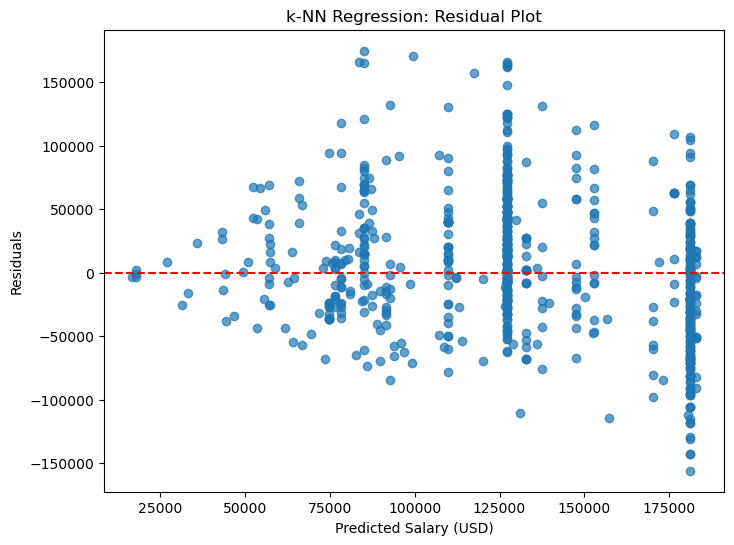

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals')
plt.title('k-NN Regression: Residual Plot')
plt.show()

# Random forest: to continue with...

In [71]:
X = filtered_data[['experience_level', 'employment_type', 'remote_ratio', 'company_size', 'company_location']]
y = filtered_data['salary_in_usd']

X_encoded = pd.get_dummies(X, columns=['experience_level', 'employment_type', 'company_size', 'company_location'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2188601349.882017
Root Mean Squared Error: 46782.48977857011
Mean Absolute Error: 36601.491153419716
R-squared: 0.3633980119320389


Could not run the program with partial dependence due to problems encountered with the sklearn inspection. 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (84,) and arg 3 with shape (5,).

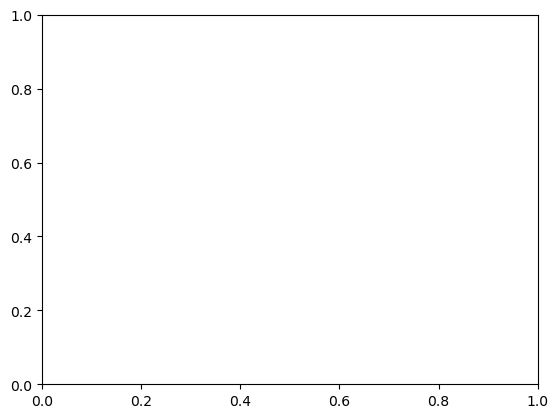

In [73]:
# Feature Importance Plot
feature_importance = rf_model.feature_importances_
features = X.columns
sorted_idx = feature_importance.argsort()

plt.barh(np.arange(len(features)), feature_importance[sorted_idx])
plt.yticks(np.arange(len(features)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (84,) and arg 3 with shape (5,).

Partial Dependence Plot (we decided in the end to remove it due to problems caused by sklearn inspection that we couldn't fix)

Coming steps:

1. hypothesis testing / anova
2. streamlit application deployment 

# Hypothesis testing 

perform a hypothesis testing where we assume that the average salary for an entry level job (experience_level = 'EN') is at least (higher than or equal to) 30.000 (salary_in_usd)

perform a hypothesis testing where we assume that there is no significant difference between the average salary for an senior and middle management position ('SE', 'ME')

# Anova 

Based on the initial dataset, we want to find if there has been any significant difference in the avg. salary for the years 2021, 2022 and 2023

# Streamlit application deployment

And finally, here comes the best part of the project!! 

In simple words, we are going to deploy a Streamlit user interface where we select the values for the input variables of our model ('experience_level','employment_type','job_title', 'remote_ratio') and the user eventually gets an estimate of the average salary (expressed in usd, irrespective of the job location) on how much he is going to get paid on average. Note that this is just an estimate which does not consider other aspects from the package benetis, such as travel allowance, insurance, overtime payment, etc. 

This will be done in Visual Studio Code script, where we will launch the streamlit application from 

# Conclussion, additional coments, limitations, further research 